In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
keras = tf.keras
from datetime import datetime

from typing import List

import os
import glob
import logging

from src.io.load import DataLoader

from dataclasses import dataclass, field
from typing import Dict
from src.action_strategy.abstract_models import ActionStrategy
from src.forecast.factory import ModelForecastFactory
from src.forecast.runner import ForecastRunner
from src.forecast.utils import SamplerSetForecast
import logging
from src.io.load import load_config, load_data
from src.io.save import Dumper
from src.preprocessing.preprocess import ProcessData
import logging
from datetime import datetime, timedelta
import math
from abc import ABC, abstractmethod

In [3]:
PATH_DATA_PROCESSED = "../data/processed/"

In [4]:
logging.basicConfig()
log=logging.getLogger(__name__)
log.setLevel(logging.DEBUG)

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

### Load data

In [30]:
end_date = datetime.strptime("01-01-2021 00", "%d-%m-%Y %H")
prices_df = load_data(name="france", end_year=end_date)

In [31]:
prices_df = prices_df.loc["2020"]

In [32]:
prices = prices_df["value"].copy()

In [33]:
prices_ = prices[24*180:24*220]
result = adfuller(prices_, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.385880437270901
n_lags: 0.14576127138853867
p-value: 0.14576127138853867
Critial Values:
   1%, -3.4373481911362997
Critial Values:
   5%, -2.864629502968925
Critial Values:
   10%, -2.56841503507527


<AxesSubplot:>

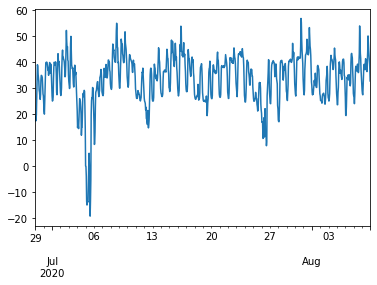

In [34]:
prices_.plot()